In [1]:
import torch
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
from torch.optim import Rprop
import numpy as np
import matplotlib.pyplot as plt

from laenge.net import LaengeNet, LaengeNetLossFunc
from laenge.dataset import LaengeDataset
from laenge.act import ChenSundman, Softplus
from utils.plot import PlotHandler 
from sgte.handler import SGTEHandler

In [6]:
def epoch(net: LaengeNet, dataloader, loss_func, optimizer):
    epoch_losses = np.zeros([len(dataloader), 5])

    for i, (temp, g, s, h, c) in enumerate(dataloader):
        temp = temp.unsqueeze(-1)

        # Forward pass
        gibbs_energy, entropy, enthalpy, heat_cap = net(temp, temp, temp, temp, debug=True)
        
        # Get the loss
        g /= 1000
        h /= 1000
        entropy *= 1000
        heat_cap *= 1000
        
        loss, gl, sl, hl, cl = loss_func(gibbs_energy.float(), g.float(), entropy.float(), s.float(), enthalpy.float(), 
                                         h.float(), heat_cap.float(), c.float(), debug=False)
        
        # Backward pass
        net.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_losses[i, 0] = loss
        epoch_losses[i, 1] = gl
        epoch_losses[i, 2] = sl
        epoch_losses[i, 3] = hl
        epoch_losses[i, 4] = cl

    mean_epoch_loss = epoch_losses.mean(axis=0)
    print('Mean epoch loss: ', mean_epoch_loss)
    return mean_epoch_loss

In [7]:
def train(net, dataset):
    # Hyperparameters
    n_epochs = 5000
    lr = 0.00075
    batch_size = 64
    loss_weights = [1/100, 7.5/100, 1.5/100, 2.5/100]

    # Data
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    # Optimizer
    optimizer = Rprop(net.parameters(), lr=lr)
    loss_func = LaengeNetLossFunc(weights=loss_weights)

    losses = []
    
    best_loss = epoch(net, dataloader, loss_func, optimizer)[0]
    best_net = net

    for i in range(n_epochs):
        loss = epoch(net, dataloader, loss_func, optimizer)
        losses.append(loss[0])
        
        if loss[0] < best_loss:
            best_net = net
        
    return losses, net

In [8]:
net = LaengeNet(init_args=(0.1, 0.2), init_func=nn.init.uniform_, hidden_dim_sub_net_2=64)
theta_E_real = 1.054571817 * 10 ** -34 * 1.7 * 10 ** 13 / (1.380649 * 10 ** -23)

net.sub_net_1.act_1._initialize_parameters(theta_E_real, 0., 0., 0.)

element = 'Fe'
phase = ['BCC_A2']
start_temp, end_temp = 200, 2000

dataset = LaengeDataset(element, phase, scaling=False, step=2, start_temp=start_temp, end_temp=end_temp)

losses, best_net = train(net, dataset)

tensor([[300.],
        [302.],
        [304.],
        [306.],
        [308.],
        [310.],
        [312.],
        [314.],
        [316.],
        [318.],
        [320.],
        [322.],
        [324.],
        [326.],
        [328.],
        [330.],
        [332.],
        [334.],
        [336.],
        [338.],
        [340.],
        [342.],
        [344.],
        [346.],
        [348.],
        [350.],
        [352.],
        [354.],
        [356.],
        [358.],
        [360.],
        [362.],
        [364.],
        [366.],
        [368.],
        [370.],
        [372.],
        [374.],
        [376.],
        [378.],
        [380.],
        [382.],
        [384.],
        [386.],
        [388.],
        [390.],
        [392.],
        [394.],
        [396.],
        [398.],
        [400.],
        [402.],
        [404.],
        [406.],
        [408.],
        [410.],
        [412.],
        [414.],
        [416.],
        [418.],
        [420.],
        [422.],
        

tensor([[1836.],
        [1838.],
        [1840.],
        [1842.],
        [1844.],
        [1846.],
        [1848.],
        [1850.],
        [1852.],
        [1854.],
        [1856.],
        [1858.],
        [1860.],
        [1862.],
        [1864.],
        [1866.],
        [1868.],
        [1870.],
        [1872.],
        [1874.],
        [1876.],
        [1878.],
        [1880.],
        [1882.],
        [1884.],
        [1886.],
        [1888.],
        [1890.],
        [1892.],
        [1894.],
        [1896.],
        [1898.],
        [1900.],
        [1902.],
        [1904.],
        [1906.],
        [1908.],
        [1910.],
        [1912.],
        [1914.],
        [1916.],
        [1918.],
        [1920.],
        [1922.],
        [1924.],
        [1926.],
        [1928.],
        [1930.],
        [1932.],
        [1934.],
        [1936.],
        [1938.],
        [1940.],
        [1942.],
        [1944.],
        [1946.],
        [1948.],
        [1950.],
        [1952.

tensor([[1964.],
        [1966.],
        [1968.],
        [1970.],
        [1972.],
        [1974.],
        [1976.],
        [1978.],
        [1980.],
        [1982.],
        [1984.],
        [1986.],
        [1988.],
        [1990.],
        [1992.],
        [1994.],
        [1996.],
        [1998.]], dtype=torch.float64)
Mean epoch loss:  [ 19831.595738   268139.53801618 109204.17046738 230496.5625
 220097.55255999]
tensor([[300.],
        [302.],
        [304.],
        [306.],
        [308.],
        [310.],
        [312.],
        [314.],
        [316.],
        [318.],
        [320.],
        [322.],
        [324.],
        [326.],
        [328.],
        [330.],
        [332.],
        [334.],
        [336.],
        [338.],
        [340.],
        [342.],
        [344.],
        [346.],
        [348.],
        [350.],
        [352.],
        [354.],
        [356.],
        [358.],
        [360.],
        [362.],
        [364.],
        [366.],
        [368.],
        [370.],

Mean epoch loss:  [  5703.58527483  80444.08886719   9329.60055433  93122.5906808
 112103.41800363]
tensor([[300.],
        [302.],
        [304.],
        [306.],
        [308.],
        [310.],
        [312.],
        [314.],
        [316.],
        [318.],
        [320.],
        [322.],
        [324.],
        [326.],
        [328.],
        [330.],
        [332.],
        [334.],
        [336.],
        [338.],
        [340.],
        [342.],
        [344.],
        [346.],
        [348.],
        [350.],
        [352.],
        [354.],
        [356.],
        [358.],
        [360.],
        [362.],
        [364.],
        [366.],
        [368.],
        [370.],
        [372.],
        [374.],
        [376.],
        [378.],
        [380.],
        [382.],
        [384.],
        [386.],
        [388.],
        [390.],
        [392.],
        [394.],
        [396.],
        [398.],
        [400.],
        [402.],
        [404.],
        [406.],
        [408.],
        [410.],
    

tensor([[300.],
        [302.],
        [304.],
        [306.],
        [308.],
        [310.],
        [312.],
        [314.],
        [316.],
        [318.],
        [320.],
        [322.],
        [324.],
        [326.],
        [328.],
        [330.],
        [332.],
        [334.],
        [336.],
        [338.],
        [340.],
        [342.],
        [344.],
        [346.],
        [348.],
        [350.],
        [352.],
        [354.],
        [356.],
        [358.],
        [360.],
        [362.],
        [364.],
        [366.],
        [368.],
        [370.],
        [372.],
        [374.],
        [376.],
        [378.],
        [380.],
        [382.],
        [384.],
        [386.],
        [388.],
        [390.],
        [392.],
        [394.],
        [396.],
        [398.],
        [400.],
        [402.],
        [404.],
        [406.],
        [408.],
        [410.],
        [412.],
        [414.],
        [416.],
        [418.],
        [420.],
        [422.],
        

tensor([[428.],
        [430.],
        [432.],
        [434.],
        [436.],
        [438.],
        [440.],
        [442.],
        [444.],
        [446.],
        [448.],
        [450.],
        [452.],
        [454.],
        [456.],
        [458.],
        [460.],
        [462.],
        [464.],
        [466.],
        [468.],
        [470.],
        [472.],
        [474.],
        [476.],
        [478.],
        [480.],
        [482.],
        [484.],
        [486.],
        [488.],
        [490.],
        [492.],
        [494.],
        [496.],
        [498.],
        [500.],
        [502.],
        [504.],
        [506.],
        [508.],
        [510.],
        [512.],
        [514.],
        [516.],
        [518.],
        [520.],
        [522.],
        [524.],
        [526.],
        [528.],
        [530.],
        [532.],
        [534.],
        [536.],
        [538.],
        [540.],
        [542.],
        [544.],
        [546.],
        [548.],
        [550.],
        

        [554.]], dtype=torch.float64)
tensor([[556.],
        [558.],
        [560.],
        [562.],
        [564.],
        [566.],
        [568.],
        [570.],
        [572.],
        [574.],
        [576.],
        [578.],
        [580.],
        [582.],
        [584.],
        [586.],
        [588.],
        [590.],
        [592.],
        [594.],
        [596.],
        [598.],
        [600.],
        [602.],
        [604.],
        [606.],
        [608.],
        [610.],
        [612.],
        [614.],
        [616.],
        [618.],
        [620.],
        [622.],
        [624.],
        [626.],
        [628.],
        [630.],
        [632.],
        [634.],
        [636.],
        [638.],
        [640.],
        [642.],
        [644.],
        [646.],
        [648.],
        [650.],
        [652.],
        [654.],
        [656.],
        [658.],
        [660.],
        [662.],
        [664.],
        [666.],
        [668.],
        [670.],
        [672.],
        [674.],
  

tensor([[684.],
        [686.],
        [688.],
        [690.],
        [692.],
        [694.],
        [696.],
        [698.],
        [700.],
        [702.],
        [704.],
        [706.],
        [708.],
        [710.],
        [712.],
        [714.],
        [716.],
        [718.],
        [720.],
        [722.],
        [724.],
        [726.],
        [728.],
        [730.],
        [732.],
        [734.],
        [736.],
        [738.],
        [740.],
        [742.],
        [744.],
        [746.],
        [748.],
        [750.],
        [752.],
        [754.],
        [756.],
        [758.],
        [760.],
        [762.],
        [764.],
        [766.],
        [768.],
        [770.],
        [772.],
        [774.],
        [776.],
        [778.],
        [780.],
        [782.],
        [784.],
        [786.],
        [788.],
        [790.],
        [792.],
        [794.],
        [796.],
        [798.],
        [800.],
        [802.],
        [804.],
        [806.],
        

tensor([[ 940.],
        [ 942.],
        [ 944.],
        [ 946.],
        [ 948.],
        [ 950.],
        [ 952.],
        [ 954.],
        [ 956.],
        [ 958.],
        [ 960.],
        [ 962.],
        [ 964.],
        [ 966.],
        [ 968.],
        [ 970.],
        [ 972.],
        [ 974.],
        [ 976.],
        [ 978.],
        [ 980.],
        [ 982.],
        [ 984.],
        [ 986.],
        [ 988.],
        [ 990.],
        [ 992.],
        [ 994.],
        [ 996.],
        [ 998.],
        [1000.],
        [1002.],
        [1004.],
        [1006.],
        [1008.],
        [1010.],
        [1012.],
        [1014.],
        [1016.],
        [1018.],
        [1020.],
        [1022.],
        [1024.],
        [1026.],
        [1028.],
        [1030.],
        [1032.],
        [1034.],
        [1036.],
        [1038.],
        [1040.],
        [1042.],
        [1044.],
        [1046.],
        [1048.],
        [1050.],
        [1052.],
        [1054.],
        [1056.

tensor([[1068.],
        [1070.],
        [1072.],
        [1074.],
        [1076.],
        [1078.],
        [1080.],
        [1082.],
        [1084.],
        [1086.],
        [1088.],
        [1090.],
        [1092.],
        [1094.],
        [1096.],
        [1098.],
        [1100.],
        [1102.],
        [1104.],
        [1106.],
        [1108.],
        [1110.],
        [1112.],
        [1114.],
        [1116.],
        [1118.],
        [1120.],
        [1122.],
        [1124.],
        [1126.],
        [1128.],
        [1130.],
        [1132.],
        [1134.],
        [1136.],
        [1138.],
        [1140.],
        [1142.],
        [1144.],
        [1146.],
        [1148.],
        [1150.],
        [1152.],
        [1154.],
        [1156.],
        [1158.],
        [1160.],
        [1162.],
        [1164.],
        [1166.],
        [1168.],
        [1170.],
        [1172.],
        [1174.],
        [1176.],
        [1178.],
        [1180.],
        [1182.],
        [1184.

KeyboardInterrupt: 

In [28]:
print('theta_E: ', best_net.sub_net_1.act_1.theta_E)
print('E0: ', best_net.sub_net_1.act_1.E0)
print('a: ', best_net.sub_net_1.act_1.a)
print('b: ', best_net.sub_net_1.act_1.b)

theta_E:  Parameter containing:
tensor(129.8500)
E0:  Parameter containing:
tensor(-269.1245, requires_grad=True)
a:  Parameter containing:
tensor(-0.1074, requires_grad=True)
b:  Parameter containing:
tensor(-0.0538, requires_grad=True)


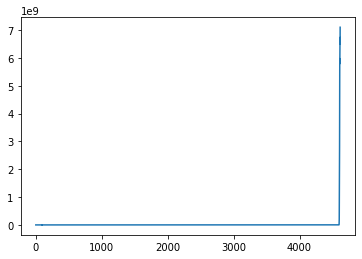

In [29]:
plt.plot(range(len(losses)), losses)

In [3]:
net = torch.load('model_04_03_22_1325')

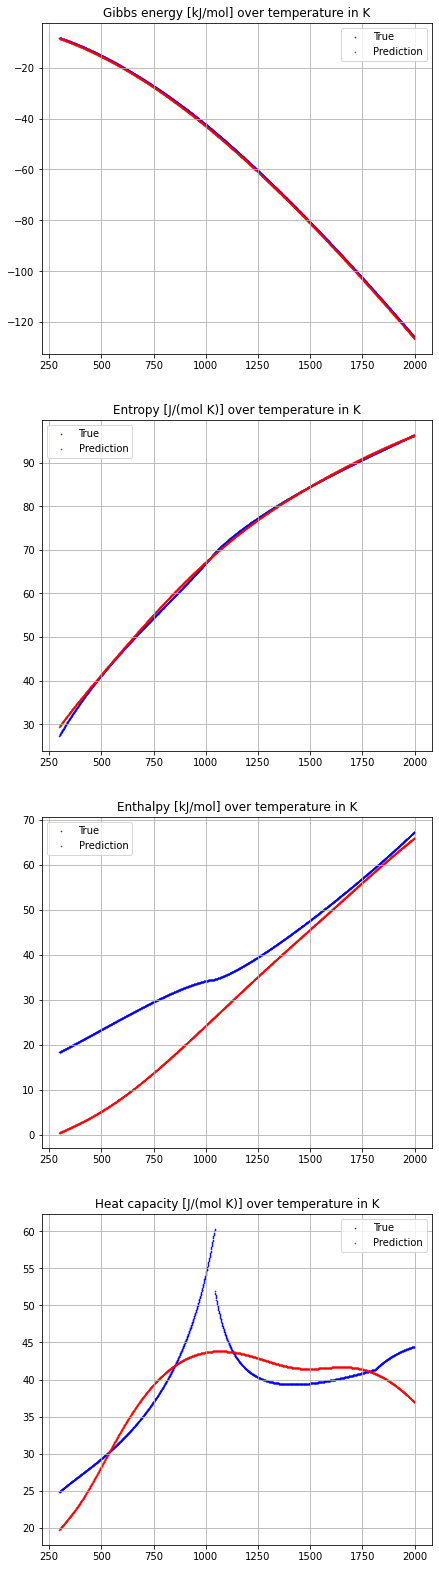

In [4]:
ph = PlotHandler('Laenge')

ph.properties_temp(net, element, phase, scaling=False, start_temp=start_temp, end_temp=end_temp)

In [ ]:
#torch.save(net, r'C:\Users\danie\Documents\Montanuni\Masterarbeit\5 Programmcodes\packages\laenge\laenge\models\model_04_03_22_1325')